# Exploring the StarFlow catalog for MWM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits

from utils import fits_to_pandas, galactic_to_galactocentric
import paths

## Join MWM DR19 with StarFlow ages

In [2]:
# Import MWM data (takes a while)
mwm = fits_to_pandas(paths.data / 'MWM' / 'astraAllStarASPCAP-0.5.0.fits.gz', hdu=2)
mwm

,sdss_id,sdss4_apogee_id,gaia_dr2_source_id,gaia_dr3_source_id,tic_v8_id,healpix,carton_0,lead,version_id,catalogid,...,raw_si_h,raw_e_si_h,raw_s_h,raw_e_s_h,raw_ti_h,raw_e_ti_h,raw_ti_2_h,raw_e_ti_2_h,raw_v_h,raw_e_v_h
0,54968703,2M03455109+5955388,474071961785254400,474071961785254400,317571372,13335,NaN,gaia_dr3_source,31,63050394798264488,...,-0.292086,0.006071,-0.409339,0.005790,-0.339466,0.005964,NaN,NaN,-0.736090,0.002810
1,116010946,2M03455125+3159498,216648634427297920,216648634427297920,26393503,45904,NaN,gaia_dr3_source,31,63050396568859167,...,-0.309680,0.006701,-0.520490,0.006531,-0.350545,0.006674,NaN,NaN,-0.774440,0.002761
2,114979218,2M03521555+1818064,49918828630624768,49918828630624768,440724320,67410,NaN,gaia_dr3_source,31,63050396552439324,...,-0.421463,0.010088,-0.423751,0.010089,-0.542645,0.010148,NaN,NaN,-0.606220,0.003592
3,115031735,2M03521570+2245296,64097924425213440,64097924425760896,440704022,60242,NaN,gaia_dr3_source,31,63050396552988608,...,-0.444328,0.000381,-0.477019,0.000376,-0.481377,0.000375,NaN,NaN,-0.682170,0.000180
4,114941357,2M03521583+1251133,37082820650773632,37082820650773632,242883458,76626,NaN,gaia_dr3_source,31,63050396551977516,...,-0.079598,0.000881,-0.116786,0.000875,-0.097946,0.000878,NaN,NaN,-0.552610,0.000382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059516,94596811,2M03484545-1058335,5115707684814361472,5115707684814361472,38615981,116561,NaN,gaia_dr3_source,31,63050395811882387,...,-0.344780,0.006060,-0.218356,0.006091,-0.312190,0.006053,NaN,NaN,-1.035100,0.002509
1059517,55105597,2M03484564+6905141,493696388912125696,493696388912125696,85623490,6420,NaN,gaia_dr3_source,31,63050394801274341,...,-0.669400,0.049834,-1.289790,0.056611,-0.287490,0.047960,NaN,NaN,0.055848,0.013404
1059518,76059297,2M03484598-0604083,3244474787104498176,3244474787104498176,38613344,108369,NaN,gaia_dr3_source,31,63050395128340475,...,0.277027,0.003557,0.169800,0.003607,0.266261,0.003562,NaN,NaN,0.385190,0.001223
1059519,116051329,2M03484604+3913412,223988493019143552,223988493019143552,201302122,35665,NaN,gaia_dr3_source,31,63050396569537105,...,-0.068621,0.002427,-0.129694,0.002420,-0.106191,0.002423,NaN,NaN,-0.149540,0.001000


In [3]:
# import astroNN
hdul = fits.open(paths.data / 'MWM' / 'astraAllStarAstroNN-0.5.0.fits.gz')
hdul[2].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1092 / length of dimension 1                          
NAXIS2  =              1421213 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                  226 / number of table fields                         
                                                                                
        Metadata                                                                
                                                                                
INSTRMNT= 'APOGEE  '           / Instrument                                     
PIPELINE= 'AstroNN '        

In [4]:
# Calculate galactocentric coordinates based on galactic l, b and Gaia dist
galr, galphi, galz = galactic_to_galactocentric(
    mwm['l'], mwm['b'], mwm['r_med_photogeo']/1000
)
mwm['galr'] = galr # kpc
mwm['galphi'] = galphi # deg
mwm['galz'] = galz # kpc

In [5]:
# Calculate [O/Fe]
mwm['o_fe'] = mwm['o_h'] - mwm['fe_h']
mwm['e_o_fe'] = np.sqrt(mwm['e_o_h']**2 + mwm['e_fe_h']**2)

In [6]:
#  Import StarFlow data (row-matched to MWM IPL-3 v0.5.0)
starflow = fits_to_pandas(paths.data / 'MWM' / 'StarFlow_summary_v1_0_0.fits')
starflow

,sdss_id,sdss4_apogee_id,age,e_p_age,e_n_age,mass,e_p_mass,e_n_mass,training_density,BITMASK
0,54968703,2M03455109+5955388,5.535536,7.329329,3.713714,0.084372,0.148237,0.006907,1.786528e+10,2
1,116010946,2M03455125+3159498,5.465465,7.497497,3.391391,0.062322,0.125374,-0.011464,1.963289e+10,2
2,114979218,2M03521555+1818064,4.526527,6.418418,2.606607,0.077874,0.136956,0.009470,1.505021e+10,3
3,115031735,2M03521570+2245296,3.223223,5.143143,1.009009,-0.000871,0.146377,-0.238708,8.614447e+08,2
4,114941357,2M03521583+1251133,2.984985,4.442442,1.499499,0.157419,0.221500,0.080051,2.417527e+10,2
...,...,...,...,...,...,...,...,...,...,...
1059516,94596811,2M03484545-1058335,NaN,NaN,NaN,0.001737,0.129269,-0.191596,0.000000e+00,0
1059517,55105597,2M03484564+6905141,14.000000,13.971944,13.158317,0.166411,0.274565,0.014549,6.570968e+06,0
1059518,76059297,2M03484598-0604083,14.000000,13.971944,13.607214,0.123413,0.198976,0.026994,9.323465e-02,0
1059519,116051329,2M03484604+3913412,1.010020,1.935872,0.056112,0.244404,0.302767,0.175220,1.849330e+10,2


In [7]:
# join row-by-row
mwm_starflow = mwm.join(starflow, rsuffix='_starflow')
mwm_starflow

,sdss_id,sdss4_apogee_id,gaia_dr2_source_id,gaia_dr3_source_id,tic_v8_id,healpix,carton_0,lead,version_id,catalogid,...,sdss_id_starflow,sdss4_apogee_id_starflow,age,e_p_age,e_n_age,mass_starflow,e_p_mass,e_n_mass,training_density,BITMASK
0,54968703,2M03455109+5955388,474071961785254400,474071961785254400,317571372,13335,NaN,gaia_dr3_source,31,63050394798264488,...,54968703,2M03455109+5955388,5.535536,7.329329,3.713714,0.084372,0.148237,0.006907,1.786528e+10,2
1,116010946,2M03455125+3159498,216648634427297920,216648634427297920,26393503,45904,NaN,gaia_dr3_source,31,63050396568859167,...,116010946,2M03455125+3159498,5.465465,7.497497,3.391391,0.062322,0.125374,-0.011464,1.963289e+10,2
2,114979218,2M03521555+1818064,49918828630624768,49918828630624768,440724320,67410,NaN,gaia_dr3_source,31,63050396552439324,...,114979218,2M03521555+1818064,4.526527,6.418418,2.606607,0.077874,0.136956,0.009470,1.505021e+10,3
3,115031735,2M03521570+2245296,64097924425213440,64097924425760896,440704022,60242,NaN,gaia_dr3_source,31,63050396552988608,...,115031735,2M03521570+2245296,3.223223,5.143143,1.009009,-0.000871,0.146377,-0.238708,8.614447e+08,2
4,114941357,2M03521583+1251133,37082820650773632,37082820650773632,242883458,76626,NaN,gaia_dr3_source,31,63050396551977516,...,114941357,2M03521583+1251133,2.984985,4.442442,1.499499,0.157419,0.221500,0.080051,2.417527e+10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059516,94596811,2M03484545-1058335,5115707684814361472,5115707684814361472,38615981,116561,NaN,gaia_dr3_source,31,63050395811882387,...,94596811,2M03484545-1058335,NaN,NaN,NaN,0.001737,0.129269,-0.191596,0.000000e+00,0
1059517,55105597,2M03484564+6905141,493696388912125696,493696388912125696,85623490,6420,NaN,gaia_dr3_source,31,63050394801274341,...,55105597,2M03484564+6905141,14.000000,13.971944,13.158317,0.166411,0.274565,0.014549,6.570968e+06,0
1059518,76059297,2M03484598-0604083,3244474787104498176,3244474787104498176,38613344,108369,NaN,gaia_dr3_source,31,63050395128340475,...,76059297,2M03484598-0604083,14.000000,13.971944,13.607214,0.123413,0.198976,0.026994,9.323465e-02,0
1059519,116051329,2M03484604+3913412,223988493019143552,223988493019143552,201302122,35665,NaN,gaia_dr3_source,31,63050396569537105,...,116051329,2M03484604+3913412,1.010020,1.935872,0.056112,0.244404,0.302767,0.175220,1.849330e+10,2


In [8]:
# Quality cuts
mwm_starflow = mwm_starflow[
    (mwm_starflow['sdss4_apogee_extra_target_flags'] == 0) &
    (mwm_starflow['flag_bad'] == 0) & 
    (mwm_starflow['spectrum_flags'] == 0) &
    (mwm_starflow['snr'] > 40) &
    (mwm_starflow['sdss_id'] > 0) # remove entries without SDSS-V ID
].copy()
mwm_starflow

,sdss_id,sdss4_apogee_id,gaia_dr2_source_id,gaia_dr3_source_id,tic_v8_id,healpix,carton_0,lead,version_id,catalogid,...,sdss_id_starflow,sdss4_apogee_id_starflow,age,e_p_age,e_n_age,mass_starflow,e_p_mass,e_n_mass,training_density,BITMASK
3,115031735,2M03521570+2245296,64097924425213440,64097924425760896,440704022,60242,NaN,gaia_dr3_source,31,63050396552988608,...,115031735,2M03521570+2245296,3.223223,5.143143,1.009009,-0.000871,0.146377,-0.238708,8.614447e+08,2
4,114941357,2M03521583+1251133,37082820650773632,37082820650773632,242883458,76626,NaN,gaia_dr3_source,31,63050396551977516,...,114941357,2M03521583+1251133,2.984985,4.442442,1.499499,0.157419,0.221500,0.080051,2.417527e+10,2
14,116251173,2M03521662+5013097,250444082814949760,250444082814949760,428912203,22328,NaN,gaia_dr3_source,31,63050396574108961,...,116251173,2M03521662+5013097,3.475475,5.171171,1.751752,0.080051,0.155598,-0.014153,9.618074e+09,2
16,116034228,2M03521683+3732447,220523760081484416,220523760081484416,346899013,38227,NaN,gaia_dr3_source,31,63050396569224985,...,116034228,2M03521683+3732447,3.195195,4.890891,1.401401,0.080051,0.151933,-0.006135,9.085096e+09,2
17,114983033,2M03521685+1923463,50883993679708928,50883993679708928,440705457,65362,NaN,gaia_dr3_source,31,63050396552482538,...,114983033,2M03521685+1923463,8.842843,11.043043,6.684685,0.001737,0.057774,-0.062617,1.318620e+10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059508,116012082,2M03484436+3206590,216827442507284864,216827442507284864,26529654,45905,NaN,gaia_dr3_source,31,63050396568870197,...,116012082,2M03484436+3206590,5.358717,7.350701,3.366733,0.036699,0.121443,-0.071760,1.126629e+10,2
1059509,54636799,2M03484443+5409069,444479091656883840,444479091656883840,86637304,18685,NaN,gaia_dr3_source,31,63050394790173013,...,54636799,2M03484443+5409069,2.468938,4.264529,0.533066,-0.039136,0.073487,-0.195673,3.975220e+09,2
1059511,116013775,2M03484452+3253080,217077340883615488,217077340883615488,26506842,44881,NaN,gaia_dr3_source,31,63050396568892120,...,116013775,2M03484452+3253080,3.591182,5.639279,1.346693,-0.019582,0.159232,-0.357656,4.534052e+08,2
1059514,55110083,2M03484526+6913196,494449004621344640,494449004621344640,85623628,6195,NaN,gaia_dr3_source,31,63050394801379569,...,55110083,2M03484526+6913196,5.386774,7.294589,3.478958,0.066822,0.131203,-0.011464,2.028823e+10,2


In [9]:
# drop duplicate SDSS-V IDs with the lowest SNR
mwm_starflow.sort_values(['sdss_id', 'snr'], inplace=True, ascending=True)
mwm_starflow.drop_duplicates(subset='sdss_id', keep='last', inplace=True)
mwm_starflow

,sdss_id,sdss4_apogee_id,gaia_dr2_source_id,gaia_dr3_source_id,tic_v8_id,healpix,carton_0,lead,version_id,catalogid,...,sdss_id_starflow,sdss4_apogee_id_starflow,age,e_p_age,e_n_age,mass_starflow,e_p_mass,e_n_mass,training_density,BITMASK
853169,54381291,NaN,421495278551818624,421495278551818624,403218924,16384,NaN,tic_v8,25,27021597850714872,...,54381291,NaN,4.180361,6.088176,2.244489,0.026994,0.140749,-0.131074,4.676188e+09,2
642243,54381405,NaN,421506067509558016,421506067510359808,369831290,16384,NaN,tic_v8,25,27021597850724078,...,54381405,NaN,2.440882,4.320641,0.476954,0.060054,0.207156,-0.171761,4.822940e+08,2
491862,54381959,2M00224114+5636475,421557607115380608,421557607115380608,403393455,16025,NaN,gaia_dr3_source,31,63050394783222145,...,54381959,2M00224114+5636475,3.083083,4.694695,1.429429,0.113474,0.211990,-0.014153,5.873784e+09,2
491665,54381968,2M00220667+5639444,421558740986710784,421558740986710784,403316795,16025,NaN,gaia_dr3_source,31,63050394783222492,...,54381968,2M00220667+5639444,3.377377,4.862863,1.821822,0.138856,0.195661,0.071277,3.291247e+10,2
491822,54381984,2M00223542+5645497,421560390254274304,421560390254274304,403393131,16025,NaN,gaia_dr3_source,31,63050394783223054,...,54381984,2M00223542+5645497,3.069069,4.750751,1.275275,0.031874,0.117477,-0.077964,8.887005e+09,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388355,129060942,2M16450686-4436133,5943321249674150016,5943321249674150016,235739910,167421,NaN,gaia_dr3_source,31,63050396233472976,...,129060942,2M16450686-4436133,2.676677,4.540541,0.672673,-0.071760,0.041472,-0.234208,3.363503e+09,2
458591,129060948,2M17435180-3145129,4054341276522790400,4054341276522790400,109258182,150138,NaN,gaia_dr3_source,31,63050395280560445,...,129060948,2M17435180-3145129,1.485485,3.825826,0.000000,-0.317889,-0.011464,-1.442828,2.451218e+07,0
453779,129060949,2M17064804-4130129,-1,-1,378572051,163437,NaN,tic_v8,31,63050400623762993,...,129060949,2M17064804-4130129,0.000000,1.163163,0.000000,-0.107036,0.026994,-0.312494,5.184454e+08,2
744297,129060952,2M18421778-0221529,4259525775644558592,4259525775644558592,182147492,102031,NaN,gaia_dr3_source,31,63050395619507304,...,129060952,2M18421778-0221529,0.617234,2.553106,0.000000,-0.208142,0.006907,-0.806006,1.998575e+08,2


In [10]:
# Use recommended training density cut of 3e9
mwm_starflow_good = mwm_starflow[mwm_starflow['training_density'] >= 3.e9]
mwm_starflow_good

,sdss_id,sdss4_apogee_id,gaia_dr2_source_id,gaia_dr3_source_id,tic_v8_id,healpix,carton_0,lead,version_id,catalogid,...,sdss_id_starflow,sdss4_apogee_id_starflow,age,e_p_age,e_n_age,mass_starflow,e_p_mass,e_n_mass,training_density,BITMASK
853169,54381291,NaN,421495278551818624,421495278551818624,403218924,16384,NaN,tic_v8,25,27021597850714872,...,54381291,NaN,4.180361,6.088176,2.244489,0.026994,0.140749,-0.131074,4.676188e+09,2
491862,54381959,2M00224114+5636475,421557607115380608,421557607115380608,403393455,16025,NaN,gaia_dr3_source,31,63050394783222145,...,54381959,2M00224114+5636475,3.083083,4.694695,1.429429,0.113474,0.211990,-0.014153,5.873784e+09,2
491665,54381968,2M00220667+5639444,421558740986710784,421558740986710784,403316795,16025,NaN,gaia_dr3_source,31,63050394783222492,...,54381968,2M00220667+5639444,3.377377,4.862863,1.821822,0.138856,0.195661,0.071277,3.291247e+10,2
491822,54381984,2M00223542+5645497,421560390254274304,421560390254274304,403393131,16025,NaN,gaia_dr3_source,31,63050394783223054,...,54381984,2M00223542+5645497,3.069069,4.750751,1.275275,0.031874,0.117477,-0.077964,8.887005e+09,2
491667,54382000,2M00220711+5648323,421561489765700224,421561489765700224,403317093,16025,NaN,gaia_dr3_source,31,63050394783223394,...,54382000,2M00220711+5648323,4.036036,5.787788,2.242242,0.064578,0.142633,-0.033459,1.659244e+10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255889,129060909,2M13582184-6202236,5866253799616922112,5866253799616922112,325588166,185382,NaN,gaia_dr3_source,31,63050396108514375,...,129060909,2M13582184-6202236,1.695696,2.592593,0.826827,0.315579,0.379994,0.241419,1.396342e+10,2
415713,129060916,2M18513241-0027496,4266101851597309824,4266101851597309824,1781764882,99474,NaN,gaia_dr3_source,31,63050395632288218,...,129060916,2M18513241-0027496,6.138138,8.254254,4.008008,-0.044888,0.046192,-0.164074,6.301218e+09,2
736589,129060928,2M18243818-1635046,4096998479419908352,4096998479419908352,333258955,126601,NaN,gaia_dr3_source,31,63050395404576784,...,129060928,2M18243818-1635046,5.078156,6.873747,3.366733,0.117477,0.168187,0.060054,2.347997e+10,2
486016,129060933,AP17170016-2924116,4107328146305567488,4107328146305567488,80356057,146544,NaN,gaia_dr3_source,31,63050395433200649,...,129060933,AP17170016-2924116,4.176176,6.124124,2.228228,0.066822,0.157419,-0.050718,4.359177e+09,2


## Plots!

In [11]:
local_sample = mwm_starflow_good[
    (mwm_starflow_good['galr'] >= 7.) &
    (mwm_starflow_good['galr'] < 9.) &
    (mwm_starflow_good['galz'].abs() < 2.)
]
local_sample

,sdss_id,sdss4_apogee_id,gaia_dr2_source_id,gaia_dr3_source_id,tic_v8_id,healpix,carton_0,lead,version_id,catalogid,...,sdss_id_starflow,sdss4_apogee_id_starflow,age,e_p_age,e_n_age,mass_starflow,e_p_mass,e_n_mass,training_density,BITMASK
955513,54382295,NaN,421589183715747968,421589183715747968,327577724,16024,NaN,tic_v8,25,27021597850733418,...,54382295,NaN,3.170341,4.460922,1.851703,0.200625,0.286877,0.088651,5.031018e+09,2
491087,54382700,2M00200721+5700122,421625909974353280,421625914277199872,406762101,15668,NaN,gaia_dr3_source,31,63050394783245110,...,54382700,2M00200721+5700122,3.881882,5.451451,2.326326,0.131203,0.188954,0.064578,2.481399e+10,2
494479,54383757,2M00290801+5640111,421706109904337024,421706109904337024,320047050,16027,NaN,gaia_dr3_source,31,63050394783273185,...,54383757,2M00290801+5640111,3.293293,4.694695,1.877878,0.169956,0.238413,0.086517,1.702718e+10,2
152679,54384509,2M00271056+5654556,421762352496488832,421762352496488832,319844954,15670,NaN,gaia_dr3_source,31,63050394783292573,...,54384509,2M00271056+5654556,3.027027,4.526527,1.513514,0.148237,0.211990,0.073487,1.887388e+10,2
492595,54384846,2M00243538+5721145,421790050746644480,421790050746644480,354601575,15670,NaN,gaia_dr3_source,31,63050394783302697,...,54384846,2M00243538+5721145,3.265265,4.736737,1.793794,0.161038,0.239919,0.062322,1.224325e+10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89970,129060727,2M10455986-6014078,5254217214725965184,5254217214725965184,391155000,183791,NaN,gaia_dr3_source,31,63050395843775337,...,129060727,2M10455986-6014078,1.065065,1.905906,0.238238,0.286877,0.354209,0.207156,1.013922e+10,2
290963,129060768,2M09150089-4756448,5326450696258684032,5326450696258684032,461741387,171468,NaN,gaia_dr3_source,31,63050395876069826,...,129060768,2M09150089-4756448,4.120120,5.829830,2.480480,0.107400,0.164627,0.039092,2.482052e+10,2
340521,129060777,2M09120875-4832413,5326054081799907712,5326054081799907712,372916511,171914,NaN,gaia_dr3_source,31,63050395875989157,...,129060777,2M09120875-4832413,4.470470,6.418418,2.522523,0.075686,0.140749,-0.003495,9.467461e+09,2
287602,129060864,2M09093978-4751104,5326886175877017088,5326886175877017088,74380758,171016,NaN,gaia_dr3_source,31,63050395876148699,...,129060864,2M09093978-4751104,2.466466,3.797798,1.093093,0.182141,0.250312,0.099167,2.036655e+10,2


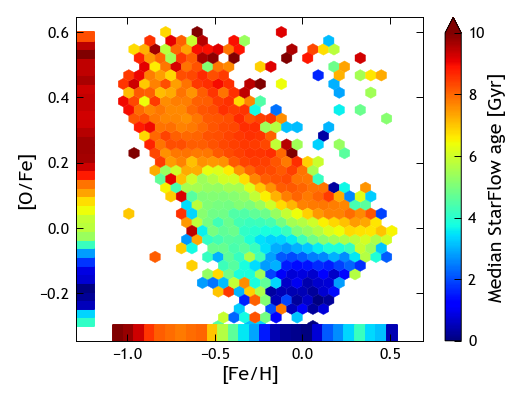

In [13]:
plt.style.use(paths.styles / 'poster.mplstyle')
fig, ax = plt.subplots(figsize=(4, 3), dpi=140)
cmap = 'jet'
# Full abundance plot
pcm0 = ax.hexbin(
    local_sample['fe_h'], local_sample['o_fe'],
    C=local_sample['age'],
    reduce_C_function=np.median,
    gridsize=30, cmap=cmap, linewidths=0.2,
    extent=[-1.2, 0.6, -0.3, 0.6],
    marginals=True, vmax=10
)
cbar = fig.colorbar(pcm0, ax=ax, orientation='vertical', extend='max')
cbar.ax.set_ylabel('Median StarFlow age [Gyr]')
ax.set_xlabel('[Fe/H]')
ax.set_ylabel('[O/Fe]')
plt.show()

In [20]:
from matplotlib.colors import Normalize, LogNorm, BoundaryNorm
from matplotlib.cm import ScalarMappable

def setup_colorbar(fig, cmap=None, vmin=None, vmax=None, label='', 
                   width=0.02, pad=0.01, labelpad=0, lognorm=False, 
                   bounds=[], extend='neither', orientation='vertical', 
                   bottom=None):
    """
    Configure a vertical colorbar with a specified colormap and normalization.

    Parameters
    ----------
    fig : matplotlib.figure.Figure
    cmap : str or matplotlib.colors.Colormap
        Colormap to use. The default is None.
    vmin : float or None
        Minimum data value which will be mapped to 0.
    vmax : float or None
        Maximum data value which will be mapped to 1.
    label : str, optional
        Colorbar label
    width : float, optional
        Width of the colorbar as a fraction of figure size. The default is 0.02
    pad : float, optional
        Spacing between the right-most plot and the colorbar as a fraction of
        figure size. The default is 0.02.
    labelpad : float, optional
        Padding between colorbar and label in points. The default is 0.
    lognorm : bool, optional
        If True, assigns a logarithmic normalization instead of linear.
        The default is False.
    bounds : list, optional
        If provided, a discrete colorbar will be created using BoundaryNorm.
        The default is [].
    bottom : float or NoneType, optional
        If not None, set the position of the bottom of the colorbar. If None,
        the bottom of the subplot parameters is taken. The default is None.

    Returns
    -------
    cbar : matplotlib.colorbar.Colorbar
        Colorbar object
    """
    if type(cmap) == str:
        cmap = plt.get_cmap(cmap)
    # Define the bottom coordinate of the colorbar
    if bottom is None:
        cax_bottom = fig.subplotpars.bottom
    else:
        cax_bottom = bottom
    if orientation == 'horizontal':
        # Define colorbar axis
        height = fig.subplotpars.right - fig.subplotpars.left
        cax = plt.axes([fig.subplotpars.left, cax_bottom, 
                        height, width])
        # Adjust subplots
        plt.subplots_adjust(bottom=cax_bottom + (width + pad + 0.03))
    else:
        # Adjust subplots
        plt.subplots_adjust(right=fig.subplotpars.right - (width + pad + 0.03))
        # Define colorbar axis
        height = fig.subplotpars.top - cax_bottom
        cax = plt.axes([fig.subplotpars.right + pad, cax_bottom, 
                        width, height])
    # Set normalization
    if len(bounds) > 0:
        norm = BoundaryNorm(bounds, cmap.N, extend=extend)
    elif lognorm:
        norm = LogNorm(vmin=vmin, vmax=vmax)
    else:
        norm = Normalize(vmin=vmin, vmax=vmax)
    cbar = fig.colorbar(ScalarMappable(norm, cmap), cax, 
                        orientation=orientation, extend=extend)
    cbar.set_label(label, labelpad=labelpad)
    return cbar

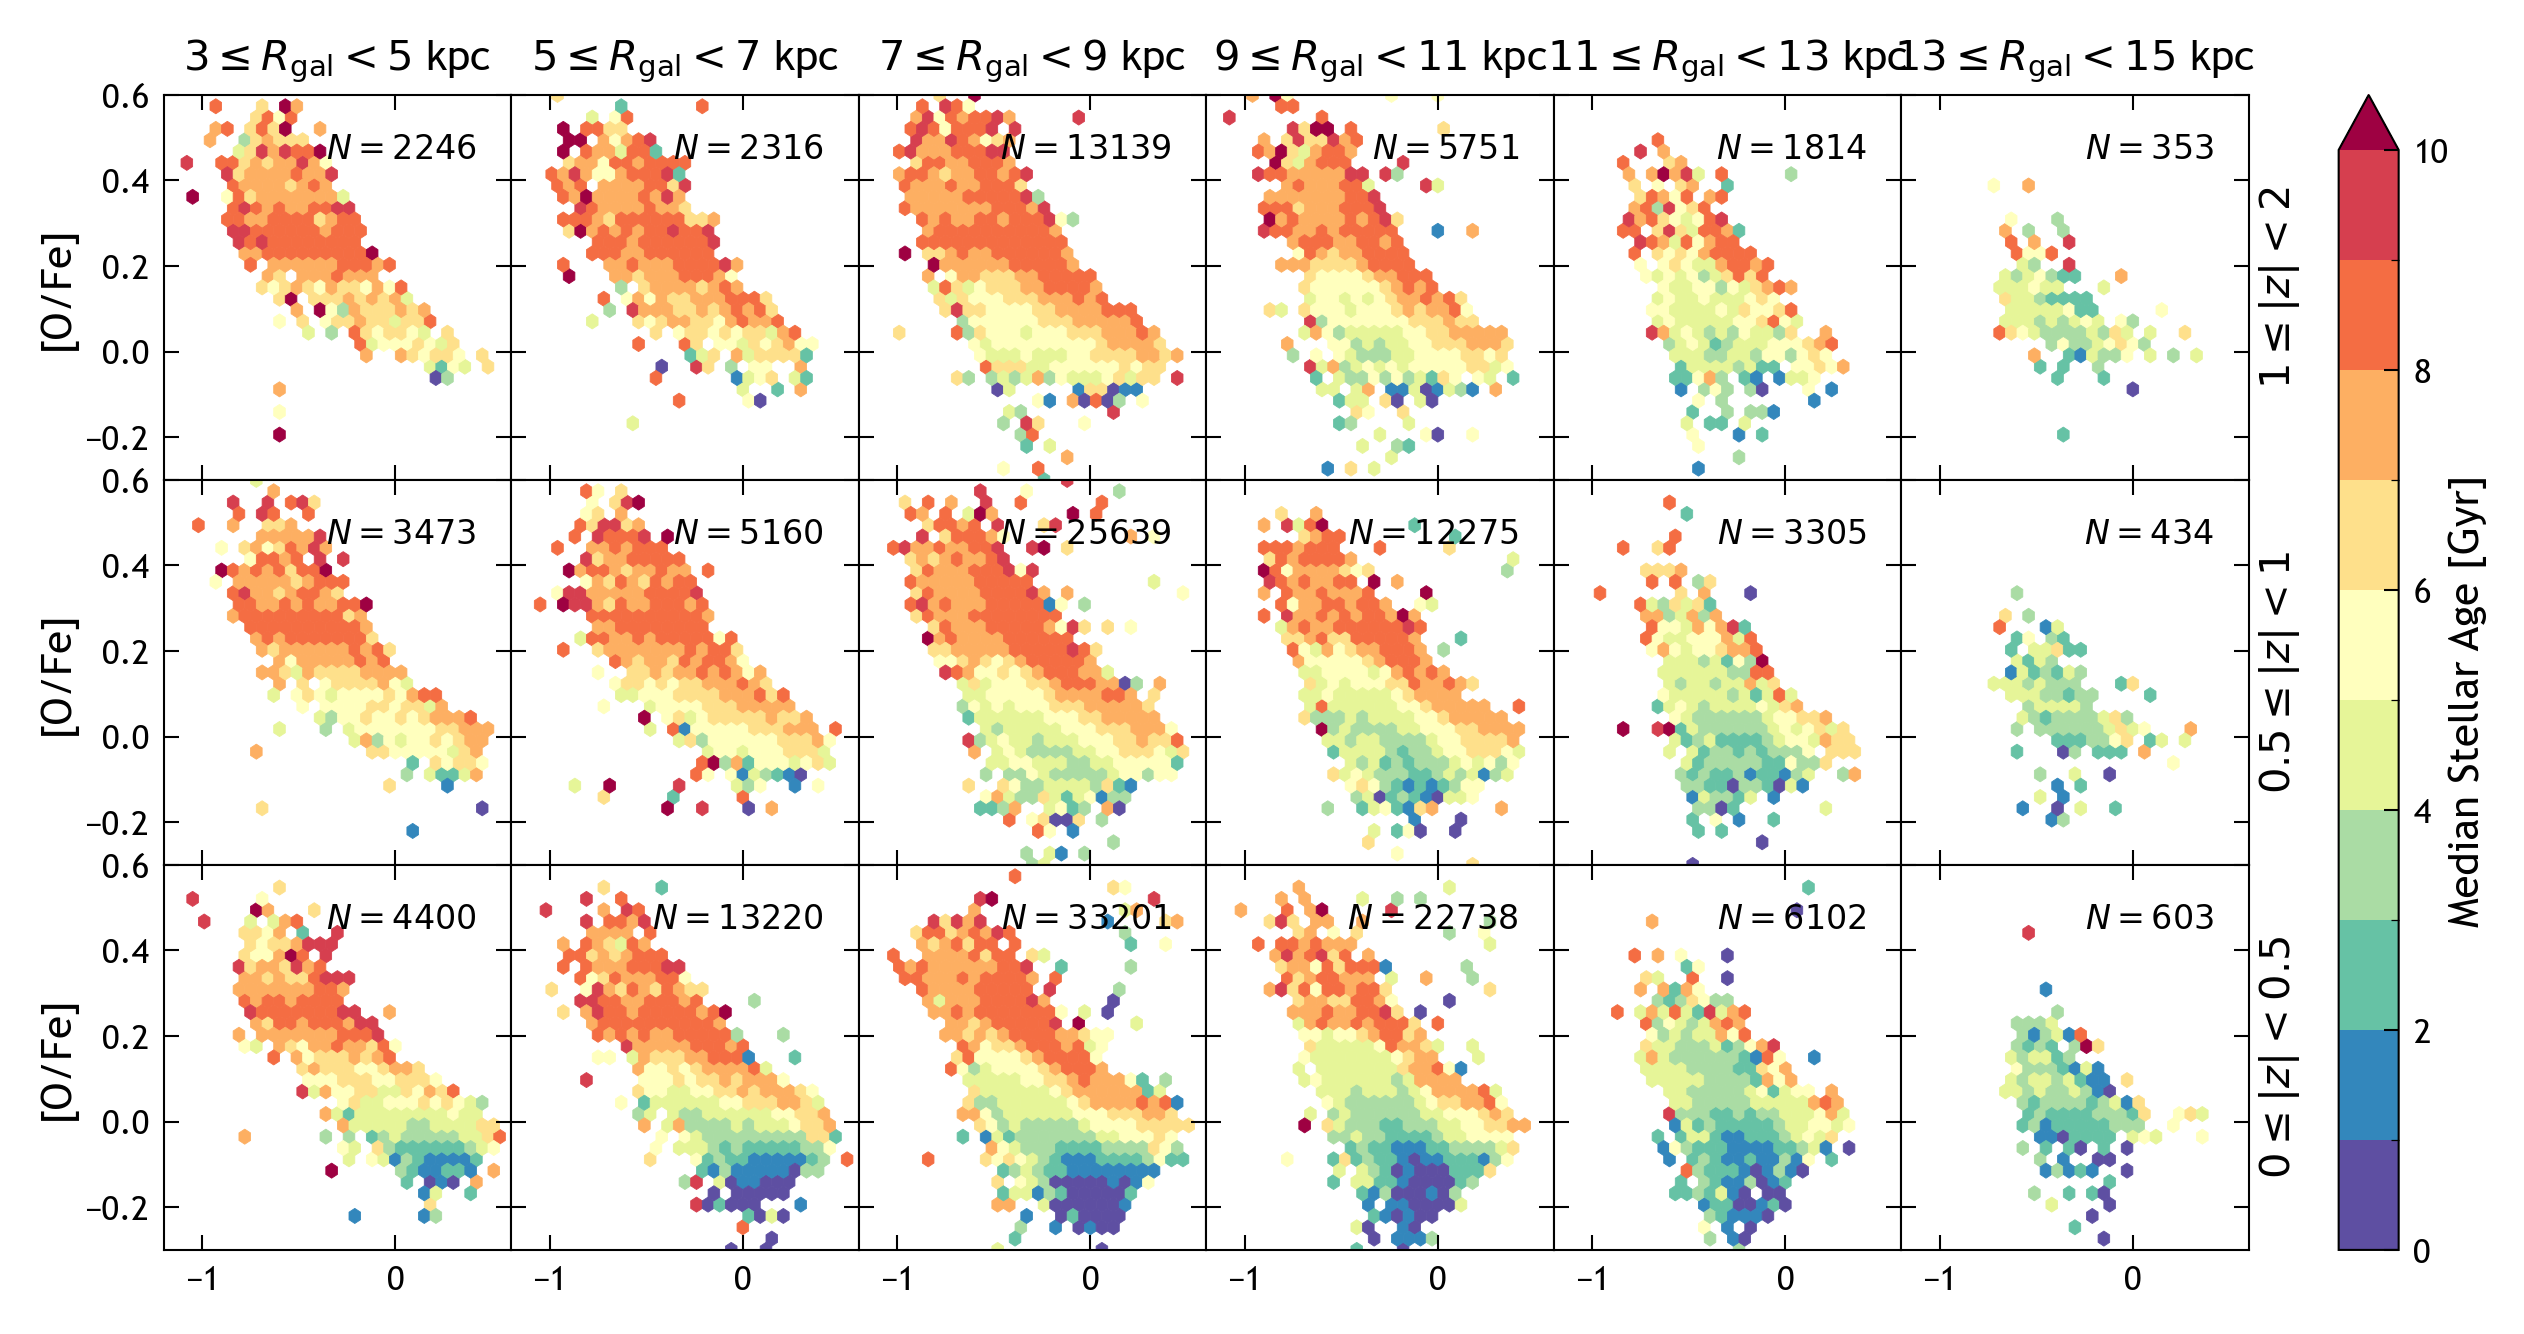

In [22]:
galr_bins = [3, 5, 7, 9, 11, 13, 15]
absz_bins = [0, 0.5, 1, 2]
cmap_name = 'Spectral_r'
gridsize = 30
bounds = [-1.2, 0.6, -0.3, 0.6]
vmax = 10

# fig, axs = setup_axes(
#     galr_bins=galr_bins, absz_bins=absz_bins, 
#     xlabel='[Fe/H]', ylabel='[O/Fe]',
#     xlim = bounds[:2], ylim=bounds[2:],
#     width=10, row_label_col=5
# )
fig, axs = plt.subplots(
    len(absz_bins)-1, len(galr_bins)-1,
    figsize=(10, 5),
    sharex=True, sharey=True,
    gridspec_kw={'hspace': 0., 'wspace': 0.}
)
axs[0,0].set_xlim(bounds[:2])
axs[0,0].set_ylim(bounds[2:])
cbar = setup_colorbar(
    fig, cmap=cmap, vmax=vmax, label='Median Stellar Age [Gyr]', extend='max', 
    bounds=np.arange(0, 11, 1), pad=0.03
)
for i, row in enumerate(axs):
    absz_lim = (absz_bins[-(i+2)], absz_bins[-(i+1)])
    row[0].set_ylabel('[O/Fe]')
    row[-1].yaxis.set_label_position('right')
    row[-1].set_ylabel(r'$%s\leq|z|<%s$' % absz_lim)
    for j, ax in enumerate(row):
        galr_lim = (galr_bins[j], galr_bins[j+1])
        if i==0:
            ax.set_title(r'$%s\leq R_{\rm gal} < %s$ kpc' % galr_lim)
        if i==len(absz_bins)-1:
            ax.set_xlabel('[Fe/H]')
        subset = mwm_starflow_good[
            (mwm_starflow_good['galr'] >= galr_lim[0]) &
            (mwm_starflow_good['galr'] < galr_lim[1]) &
            (mwm_starflow_good['galz'].abs() >= absz_lim[0]) &
            (mwm_starflow_good['galz'].abs() < absz_lim[1])
        ]
        pcm = ax.hexbin(
            subset['fe_h'], subset['o_fe'],
            C=subset['age'],
            reduce_C_function=np.median,
            gridsize=gridsize, cmap=cbar.cmap, linewidths=0.2,
            extent=bounds, norm=cbar.norm
        )
        ax.text(0.9, 0.9, r'$N=%s$' % subset.shape[0],
                va='top', ha='right', transform=ax.transAxes)
fig.set_dpi(300)
plt.show()

In [69]:
def binned_medians(data, col, bin_col, bin_edges):
    cut_data = pd.cut(data[bin_col], bin_edges)
    grouped = data.groupby(cut_data, observed=False)[col]
    return grouped.median()

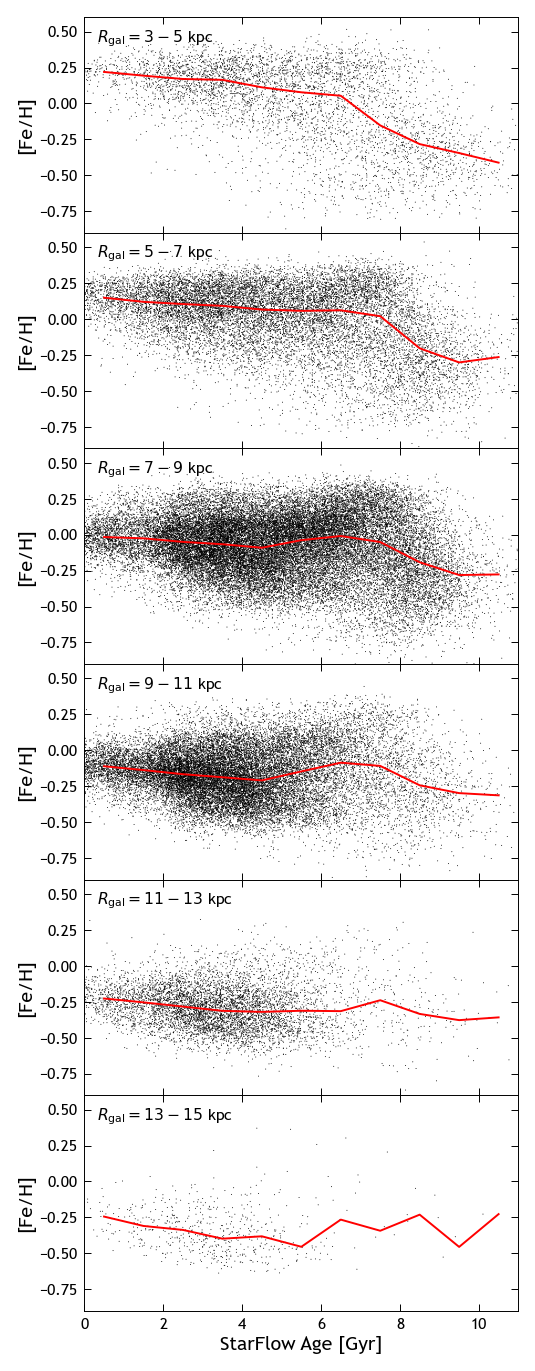

In [73]:
fig, axs = plt.subplots(
    6, 1, figsize=(4, 12), 
    dpi=140, sharex=True, sharey=True, 
    gridspec_kw={'hspace': 0., 'wspace': 0.}
)
absz_lim = (0, 0.5)
age_bins = np.arange(12)
for i, ax in enumerate(axs):
    galr_lim = (3+i*2, 5+i*2)
    subset = mwm_starflow_good[
        (mwm_starflow_good['galr'] >= galr_lim[0]) &
        (mwm_starflow_good['galr'] < galr_lim[1]) &
        (mwm_starflow_good['galz'].abs() >= absz_lim[0]) &
        (mwm_starflow_good['galz'].abs() < absz_lim[1])
    ]
    ax.scatter(
        subset['age'], subset['fe_h'], 
        s=1, marker='.', rasterized=True, edgecolor='none', c='k'
    )
    median_feh = binned_medians(subset, 'fe_h', 'age', age_bins)
    ax.plot(age_bins[:-1]+0.5, median_feh, c='r', ls='-')
    ax.set_ylabel('[Fe/H]')
    ax.text(0.03, 0.95, r'$R_{\rm gal}=%s-%s$ kpc' % galr_lim,
            va='top', ha='left', transform=ax.transAxes)
axs[-1].set_xlabel('StarFlow Age [Gyr]')
axs[0].set_ylim((-0.9, 0.6))
axs[0].set_xlim((0, 11))
plt.show()